In [8]:
import cv2

source = cv2.VideoCapture(0)
# source = cv2.VideoCapture("http://192.168.137.152:4747/video")

win_name = "camera"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
cv2.resizeWindow(win_name, 640, 480)

while cv2.waitKey(1) != 27:
    has_frame, frame = source.read()
    if not has_frame:
        break

    frame = cv2.flip(frame, 1)

    cv2.imshow(win_name, frame)

source.release()
cv2.destroyWindow(win_name)


In [11]:
frame.shape

(480, 640, 3)

In [18]:
import cv2
import os

source = cv2.VideoCapture(0)
# source = cv2.VideoCapture("http://192.168.137.152:4747/video")

win_name = "camera"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
cv2.resizeWindow(win_name, 640, 480)

prototxt = os.path.join("resources", "lesson4", "deploy.prototxt")
model = os.path.join("resources", "lesson4", "res10_300x300_ssd_iter_140000_fp16.caffemodel")

net = cv2.dnn.readNetFromCaffe(prototxt, model)

# model parameters
in_width = 300
in_height = 300
mean = [104, 117, 123]
conf_threshold = 0.7

while cv2.waitKey(1) != 27:
    has_frame, frame = source.read()
    if not has_frame:
        break

    frame = cv2.flip(frame, 1)
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]

    blob = cv2.dnn.blobFromImage(frame, 1.0, (in_width, in_height), mean, swapRB=False, crop=False)

    net.setInput(blob)
    detections = net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x_top_left = int(detections[0, 0, i, 3] * frame_width)
            y_top_left = int(detections[0, 0, i, 4] * frame_height)
            x_bottom_right = int(detections[0, 0, i, 5] * frame_width)
            y_bottom_right = int(detections[0, 0, i, 6] * frame_height)

            cv2.rectangle(frame, (x_top_left, y_top_left), (x_bottom_right, y_bottom_right), (0, 255, 0), 4)

    cv2.imshow(win_name, frame)

source.release()
cv2.destroyWindow(win_name)

In [14]:
import csv
import os

class_map = {}

with open(os.path.join('resources', 'lesson4', 'googLeNet', 'classes.csv'), 'r', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        class_map[row['Class ID']] = row['Class Name']

print(class_map['932'])


pretzel


tiger cat 0.48088083


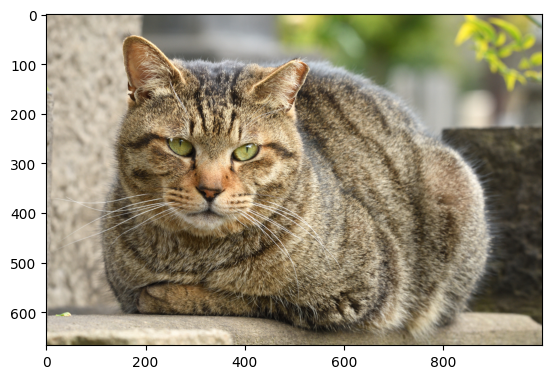

In [17]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread(os.path.join('resources', 'lesson3', 'dog.jpg'))

prototxt = os.path.join("resources", "lesson4", "googLeNet", "deploy.prototxt")
model = os.path.join("resources", "lesson4", "googLeNet", "bvlc_googlenet.caffemodel")

net = cv2.dnn.readNetFromCaffe(prototxt, model)

# model parameters
in_width = 224
in_height = 224
mean = [104, 117, 123]
conf_threshold = 0.7

blob = cv2.dnn.blobFromImage(img, 1.0, (in_width, in_height), mean, swapRB=False, crop=False)

net.setInput(blob)
detections = net.forward()

max_value = np.max(detections)

index = np.argwhere(detections == max_value)
print(class_map[str(index[0][1])], max_value)

plt.imshow(img[:,:,::-1])